In [2]:
import numpy as np
import os
import cv2

In [3]:
root = "/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/"

In [4]:
masks_root_path = root + "ann/"
images_root_path = root + "img/"

In [5]:
mask_load_path = masks_root_path + "channeled/"

for mask_name in [c for c in os.listdir(mask_load_path)]:
    mask_path = mask_load_path + mask_name
    loaded_mask = np.load(mask_path, allow_pickle=True)
    
    # mask_name
    np.save(masks_root_path + 'all/' + mask_name, loaded_mask)
    
    # mirror_y
    mirror_y = np.flip(loaded_mask, 1)
    np.save(masks_root_path + 'all/my_' + mask_name, mirror_y)
    np.save(masks_root_path + '/mirrored_y/my_' + mask_name, mirror_y)
    
    # mirror_x
    mirror_x = np.flip(loaded_mask, 0)
    np.save(masks_root_path + 'all/mx_' + mask_name, mirror_x)
    np.save(masks_root_path + '/mirrored_x/mx_' + mask_name, mirror_x)

    # mirror_xy
    mirror_xy = np.flip(mirror_x, 1)
    np.save(masks_root_path + 'all/mxy_' + mask_name, mirror_xy)
    np.save(masks_root_path + '/mirrored_xy/mxy_' + mask_name, mirror_xy)

In [6]:
image_load_path = images_root_path + "original/"
    
for img_name in [c for c in os.listdir(image_load_path)]:

    # load_path/ + '1207 - asdasd.jpg' or 'xyz.jpg'
    img_path = image_load_path + img_name

    if os.path.isdir(img_path):
        continue
    
    loaded_img = cv2.imread(img_path)

    # img_name
    cv2.imwrite(images_root_path + 'all/' + img_name, loaded_img)

    # mirror_y
    mirror_y = np.flip(loaded_img, 1)
    cv2.imwrite(images_root_path + 'all/my_' + img_name, mirror_y)
    cv2.imwrite(images_root_path + '/mirrored_y/my_' + img_name, mirror_y)

    # mirror_x
    mirror_x = np.flip(loaded_img, 0)
    cv2.imwrite(images_root_path + 'all/mx_' + img_name, mirror_x)
    cv2.imwrite(images_root_path + '/mirrored_x/mx_' + img_name, mirror_x)

    # mirror_xy
    mirror_xy = np.flip(mirror_x, 1)
    cv2.imwrite(images_root_path + 'all/mxy_' + img_name, mirror_xy)
    cv2.imwrite(images_root_path + '/mirrored_xy/mxy_' + img_name, mirror_xy)

# --

In [6]:
import matplotlib.pyplot as plt
category_mapping = {0: "empty", 1: "dark", 2: "busbar", 3: "crack", 4: "non-cell"}

def another_inf_and_show(img, gt_mask):
    fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10, 10), layout='compressed')

    ax[0, 0].imshow(img, cmap='gray', interpolation='None')
    ax[0, 0].axis('off')
    ax[0, 0].set_title('(a) EL image', fontsize='xx-large')
    ##
    for i in range(5):
        ax[1, i].imshow(gt_mask[i], cmap='viridis', interpolation='None')
        ax[1, i].axis('off')
        ax[1, i].set_title(f'({i}) {category_mapping[i]} activation')

In [18]:
def flip_my_mask(mask, flip_dir):
    channels = []
    for c in range(mask.shape[0]):
        channel = mask[c]
        flipped_channel = np.flip(channel, flip_dir)
        channels.append(flipped_channel)
    flipped_mask = np.stack(channels, axis=0)
    return flipped_mask

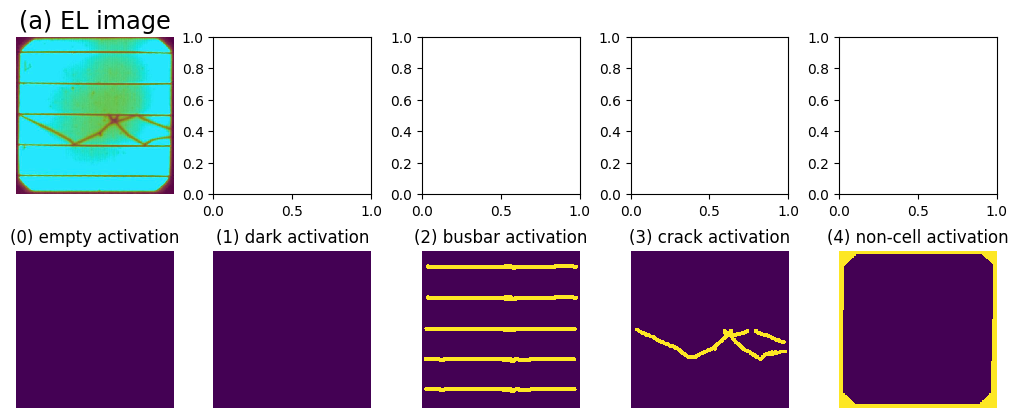

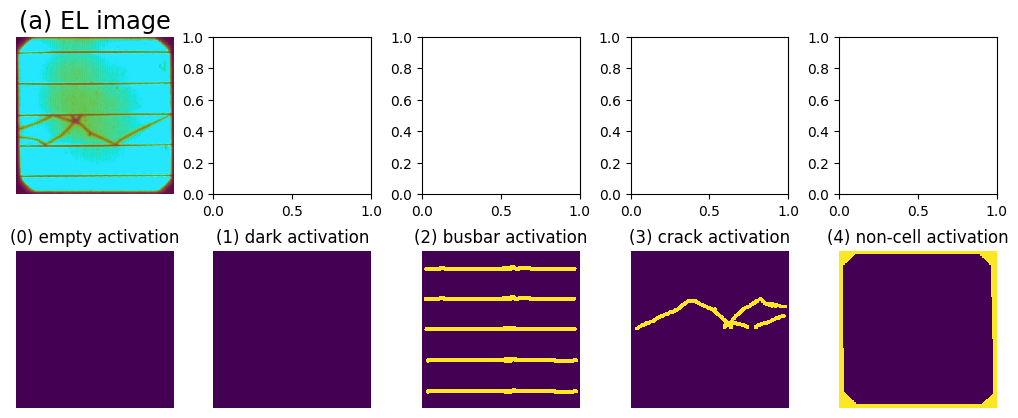

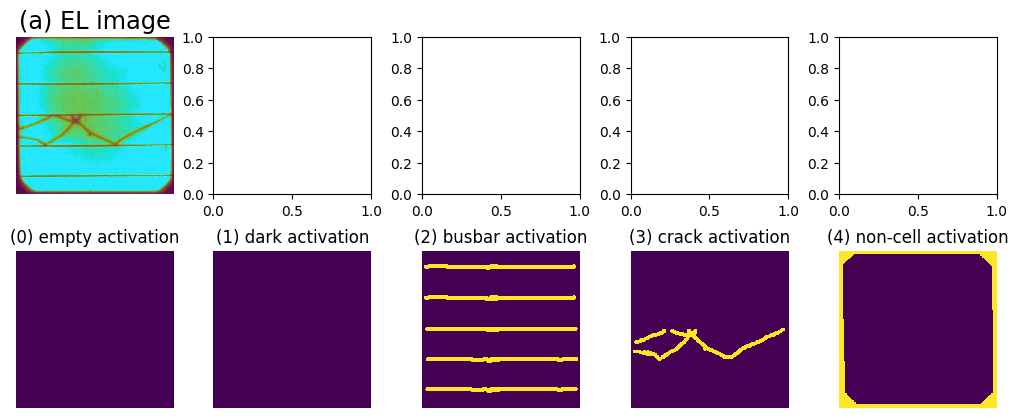

In [19]:
mask_load_path = masks_root_path + "channeled/"
image_load_path = images_root_path + "original/"

masks = [c for c in os.listdir(mask_load_path)]
images = [c for c in os.listdir(image_load_path)]

n = 4
mask_name = masks[n]

img_name = mask_name[:-4] + ".jpg"

mask_path = mask_load_path + mask_name
img_path = image_load_path + img_name

loaded_mask = np.load(mask_path, allow_pickle=True)
loaded_img = cv2.imread(img_path)

another_inf_and_show(loaded_img, loaded_mask)

mirror_y_img = np.flip(loaded_img, 1)
mirror_y_mask = np.flip(loaded_mask, 1)
another_inf_and_show(mirror_y_img, mirror_y_mask)

mirror_y_img = np.flip(loaded_img, 1)
mirror_y_mask = flip_my_mask(loaded_mask, 1)
another_inf_and_show(mirror_y_img, mirror_y_mask)

In [ ]:
masks

In [ ]:
images

In [20]:
mask_load_path = masks_root_path + "channeled/"

for mask_name in [c for c in os.listdir(mask_load_path)]:
    mask_path = mask_load_path + mask_name
    loaded_mask = np.load(mask_path, allow_pickle=True)
    
    # mask_name
    np.save(masks_root_path + 'all/' + mask_name, loaded_mask)
    
    # mirror_y
    mirror_y = flip_my_mask(loaded_mask, 1)
    np.save(masks_root_path + 'all/my_' + mask_name, mirror_y)
    np.save(masks_root_path + '/mirrored_y/my_' + mask_name, mirror_y)
    
    # mirror_x
    mirror_x = flip_my_mask(loaded_mask, 0)
    np.save(masks_root_path + 'all/mx_' + mask_name, mirror_x)
    np.save(masks_root_path + '/mirrored_x/mx_' + mask_name, mirror_x)

    # mirror_xy
    mirror_xy = flip_my_mask(mirror_x, 1)
    np.save(masks_root_path + 'all/mxy_' + mask_name, mirror_xy)
    np.save(masks_root_path + '/mirrored_xy/mxy_' + mask_name, mirror_xy)

In [21]:
image_load_path = images_root_path + "original/"
    
for img_name in [c for c in os.listdir(image_load_path)]:

    # load_path/ + '1207 - asdasd.jpg' or 'xyz.jpg'
    img_path = image_load_path + img_name

    if os.path.isdir(img_path):
        continue
    
    loaded_img = cv2.imread(img_path)

    # img_name
    cv2.imwrite(images_root_path + 'all/' + img_name, loaded_img)

    # mirror_y
    mirror_y = np.flip(loaded_img, 1)
    cv2.imwrite(images_root_path + 'all/my_' + img_name, mirror_y)
    cv2.imwrite(images_root_path + '/mirrored_y/my_' + img_name, mirror_y)

    # mirror_x
    mirror_x = np.flip(loaded_img, 0)
    cv2.imwrite(images_root_path + 'all/mx_' + img_name, mirror_x)
    cv2.imwrite(images_root_path + '/mirrored_x/mx_' + img_name, mirror_x)

    # mirror_xy
    mirror_xy = np.flip(mirror_x, 1)
    cv2.imwrite(images_root_path + 'all/mxy_' + img_name, mirror_xy)
    cv2.imwrite(images_root_path + '/mirrored_xy/mxy_' + img_name, mirror_xy)

---

split 

In [22]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

In [23]:
root = "/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/"
masks_root_path = root + "ann/all/"
images_root_path = root + "img/all/"

image_file_extension = "jpg"

In [24]:
masks = [c for c in os.listdir(masks_root_path)]
img_files = [c for c in os.listdir(images_root_path)]

masks_train_set, masks_val_set = train_test_split(masks, random_state=42, shuffle=False)
img_train_set, img_val_set = train_test_split(img_files, random_state=42, shuffle=False)

In [25]:
img_train_dir = root + "img/train/"
img_val_dir = root + "img/val/"

ann_train_dir = root + "ann/train/"
ann_val_dir = root + "ann/val/"

In [26]:
for mask in masks_train_set:
    loaded_mask = np.load(masks_root_path + mask)
    np.save(ann_train_dir + mask, loaded_mask)
    
    name = mask[0:-4]
    name += "." + image_file_extension
    print(images_root_path + name)
    img = cv2.imread(images_root_path + name)
    cv2.imwrite(img_train_dir + name, img)
    
for mask in masks_val_set:
    loaded_mask = np.load(masks_root_path + mask)
    np.save(ann_val_dir + mask, loaded_mask)
    
    name = mask[0:-4]
    name += "." + image_file_extension
    img = cv2.imread(images_root_path + name)
    cv2.imwrite(img_val_dir + name, img)

/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/mx_1217 - Old TC for PID_2_front_Isc (EL Image).jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/1_EL_18.09.2023-15-40-40_unknownID_ASU Minisample_SHJ5_103.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/mx_3_EL_18.09.2023-15-00-34_unknownID_ASU Minisample_07_68.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/1240 - NICE_SHJ_2_Isc (EL Image).jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/1220 - Old TC for PID_2_rear_Isc (EL Image).jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/my_1302 - NICE TOPCon 2 Front Enapsulated (EL Image).jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/3_EL_18.09.2023-15-43-19_unknownID_ASU Minisample_SHJ6_106.jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_data/Channeled_ASU/img/all/my_1240 - NICE_SHJ_2_Isc (EL Image).jpg
/Users/ojas/Desktop/saj/SANDIA/pvcracks_d